# Rong 360 FinTech Capstone Project
- **Rong 360** is a Chinese fin-tech company (traded at NY stock market), which operates as a platform of 
loan/credit card marketplaces.
- All the platform users and the banks interact on the **Rong360** platform. 
- Through search engine, a single user can browse and research on multple loan products from many different banks.
- The user applies for multiple loans which satisfy his/her finanical need, then the individual banks approve/disaprove the loan based on the customer's risk profile. 
- The user might need to visit the bank local branch office for an interview.
- **Rong360** differentiates from the traditional loan approval process in that **Rong360** provides a centralized 
customer loan access portal.
  - The customer benefits from accessing many loan providers (banks) within one system.
  - Once the customer has a longer term history with **Rong360**, **Rong360** uses big data to gauge the customer's financial risk
profile. 
  - Even though the banks have to compete on the same platform for business, the banks could benefit by using more accurate
    propiertary risk profile to approve or reject loan applications.
- The goal of this project is to predict the loan approvals based on user attributes/loan and bank attributes.

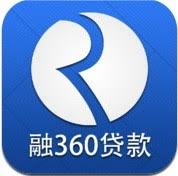

In [4]:
from IPython.display import Image
Image(filename='Rong.jpeg', height=300, width=400) 

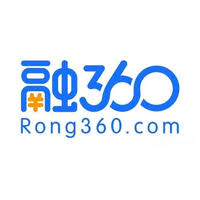

In [5]:
Image(filename='Rong2.jpeg', height=300, width=400)

### Data 
- The data set is of a median size, which consists of $140K+$ loan application records spanning two plus years.
- It was originally used in (donated to) a **Kaggle-like** ML competition in China. 
- The core of the data set is the orders_train.txt, which describes how the banks interact with the loan applicants.
- The side information user.final.txt records the user browsing behavior on the **Rong360** platform.
- The side information quality.final.txt records the applicant (user) quality records.
- The side information product.final.txt records the bank/loans information.
- Each bank approves or disapproves the loans independently based on the applicant's risk profile.
- The final result of the loan approval is recorded in the **result** column of orders_train.txt.
- Unlike many **Kaggle** competition ML projects, the columns of the dataset are preserved. So your team can try to 
interpret your finding.
- But many categorical features are integer-encoded, so the meanings of the these feature levels are missing.
- Because the features are collected from different banks, there can be formatting inconsistency issue which causes the
values to be reported in different units, causing outliers. Thus it is vital to clean your data cautiously. 

### Step 1 Background
- Study the business model of **Rong360** and 
identify the **fundamental inefficiency** it resolves in the traditional lending market.
    Complience is very dificult 
    Rather than going form bank to bank for a loan, consumers can visit a single platform to view all their options 
    Aids loan approvals for individuals and micro businesses especially in rural areas where it's dificult to access banks 
- Visit the company website to understand more about the company practice.

http://www.rong360.com/about/, https://www.rong360.com/. Google translate them if necessary.
- Answer why should a typical customer uses **Rong360**. Answer why a bank/small lender would use **Rong360** to access its client base.        
- Read 
     - https://www.boardofinnovation.com/blog/10-innovative-fintech-business-models/,
     - https://www.mckinsey.com/industries/financial-services/our-insights/banking-matters/scanning-the-fintech-landscape, 
     - https://www.fintechfutures.com/2019/12/white-paper-what-will-the-future-of-banking-look-like/, 
     - https://www.fintechfutures.com/2019/03/the-new-business-models-of-banking/   
    for the several important disruptive business models in fintech industry.
- Read the attaching help files of **Rong360** dataset to gain understanding on the meanings of the orders, quality, user, product columns.

### Role Playing
- Before starting your own project, you need to identify your own role. In this project, depending on whether you focus solely
on data analysis or both data analysis and machine learning, you are a data analyst or data scientist working for **Rong360**.


### Step 2 Data Analysis
- Remember that data analysis can be used either to gain business insights, or to gain insights for machine learning model design.
- During the data analysis stage, we would propose several ideas for you to work on.

### DA Question 1:Time Series on Loan Application Volumes
- Study the pattern of daily loan application counts as a time series. Identify the seasonality of the time series.
To understand the concept of time series seasonality, 
read https://machinelearningmastery.com/time-series-seasonality-with-python/.
- Propose the plausible explanation why there are periodic application volume dips.
- Identify the popular loan term (in months) and study the application volume time series of the prescribed term(s).
How do their growth behavior differ from each other? Please offer your explanation on the differences.
- Study how do the approval rates change with respect to the date (or month, week) variables and the loan terms.
- Optional: **Modeling** the growth of loan application volumes of each popular term as seasonal time series.
You may use the traditional seasonal arima model or the modern machine learning technique.


### DA Question 2: The Bank Branches and Approval Rates
- **Rong360** operates to target many major cities in China, including Peking and Shanghai. Based on the **city_id** and application volumes, please depict the business volumes across different cities.
- Visualize the volume growths of the major bank location cities.
- The banks can be differentiated by how many branches they operate. Some smaller banks operate in a single or only a few locations.
Others (the large banks) have branches across China.
Please study the influence of bank branch counts on 
the loan approval rates. Please offer an interpretation to the observed pattern.
- Figure out the time evolution of the small banks vs big banks application volumes.
- Answer how do the banks deal with non-local customers. Do they approve the non-local loans differently from the local loan applicants?

The insights you gain in the above analysis might be valuable for feature generation.

### DA Question 3: Product Popularity and Customer Background Analysis
- The banks would like to know what types of loan products are more popular in the market. Please analyze the data
and provide insights on what types of products are most popular. 
Do their popularities evolve w.r.t. time or vary with applicants' locations?
- Describe the distribution of aggregate loan application counts during the total time period, either by the banks or by 
the products. What are the characteristics of banks or products which have low loan applications?
- Identify the banks or individual products whose loan application volumes are growing fastest. Are there banks or products which
lose attractness to the customers?
- Among the banks who sell similar loan products, any pattern on the loan popularities and approval rates? 
- Different loan products potentially can attract different types of customers. Please analyze the user profiles of 
different loan products. Please provide an in-depth analysis on how different types of product may attract different types of users.
Notice that the grouping of product types or user types are subject to your own research.

In [1]:
import pandas as pd
import numpy as np

In [2]:
orders = pd.read_csv('order_train.txt', sep = "\t")
order_help = pd.read_csv('order_help.txt', sep = "\t")

In [4]:
orders.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ef7eb8>,
      dtype=object)

In [3]:
order_help

,"user_id：用户id, user ID"
0,"product_id：产品id, product ID"
1,date：不同日期，值越大代表离当前越近
2,"term：申请期限, application term"
3,"limit：申请金额, application limit"
4,"result：0代表贷款申请没有被批准，1代表贷款申请获得批准, 0: rejected, ..."


In [4]:
!ls -l

total 767968
-rw-r--r--@ 1 itadmin  staff     301433 Jan 22 13:22 Data Description.pages
-rw-r--r--@ 1 itadmin  staff      62443 Mar  9 10:23 Rong 360 FinTech Capstone Project Pitch.ipynb
-rw-r--r--@ 1 itadmin  staff       6558 Dec  5 12:47 Rong.jpeg
-rw-r--r--@ 1 itadmin  staff       6767 Dec  5 12:47 Rong2.jpeg
-rw-r--r--@ 1 itadmin  staff        297 Jan 22 13:10 order_help.txt
-rw-r--r--@ 1 itadmin  staff   11635573 Mar 13  2015 order_train.txt
-rw-r--r--@ 1 itadmin  staff    8248878 Mar 20  2015 product.final.txt
-rw-r--r--@ 1 itadmin  staff       1911 Jan 22 13:09 product_help.txt
-rw-r--r--@ 1 itadmin  staff  354418181 Mar 20  2015 quality.final.txt
-rw-r--r--@ 1 itadmin  staff       4588 Jan 22 12:49 quality_help.txt
-rw-r--r--@ 1 itadmin  staff   13856432 Mar 19  2015 user.final.txt
-rw-r--r--@ 1 itadmin  staff        676 Jan 22 11:03 user_help.txt


In [7]:
users = pd.read_csv('user.final.txt', sep = '\t')
users_help = pd.read_csv('user_help.txt', sep = "\t")

<Figure size 576x864 with 0 Axes>

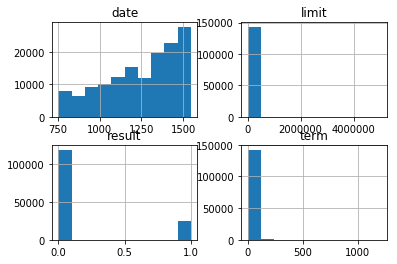

In [16]:
plt.figure(figsize = (8,12))
orders.hist()
plt.show()

In [31]:
print("percentage of rejection {}".format(orders.result.value_counts()[0]/len(orders)))
print(orders.nunique())
print(orders.shape)

percentage of rejection 0.829761372527104
user_id       134055
product_id     12280
date             793
term              60
limit            420
result             2
dtype: int64
(143152, 6)


In [28]:
orders.columns
# is it possible for a user to apply to one product multiple times?
orders.groupby('user_id').agg({'product_id':'count', "result":'median'}).sort_values('product_id',ascending=False)

,product_id,result
user_id,,
7ae3cc746e313aefc52861c1c8d367c9,36,0.0
17d6e5d1a370f4dfd809aa8bce72c10b,14,0.0
7e0eb70e5c88103d481ea542cb8eebbc,9,0.0
8850cbcd536dd84ae0bd7cff28ea97dc,9,0.0
7192802bfb058c81c490f2fefee4ea31,7,0.0
114ebbdda2a545505418fe1886eea6f2,6,0.0
3833c1c78080ce3b035d306a1c52ab00,6,0.0
b5bd00774997735b4755d6bd116537ee,6,0.0
426f80c5e20e5da6d82632f59310df14,6,0.0


In [35]:
orders.groupby('term').agg({'product_id':'count', "result":'median'}).sort_values('term',ascending=False)

,product_id,result
term,,
1200,1,0.0
720,4,0.0
360,298,0.0
300,67,0.0
240,562,0.0
196,1,0.0
180,110,0.0
120,1912,0.0
108,2,0.0


In [34]:
!ls -l

total 768144
-rw-r--r--@ 1 itadmin  staff     301433 Jan 22 13:22 Data Description.pages
-rw-r--r--  1 itadmin  staff      92304 Mar  9 13:03 Rong 360 FinTech Capstone Project Pitch-Copy2.ipynb
-rw-r--r--@ 1 itadmin  staff      59698 Mar  9 10:29 Rong 360 FinTech Capstone Project Pitch.ipynb
-rw-r--r--@ 1 itadmin  staff       6558 Dec  5 12:47 Rong.jpeg
-rw-r--r--@ 1 itadmin  staff       6767 Dec  5 12:47 Rong2.jpeg
-rw-r--r--@ 1 itadmin  staff        297 Jan 22 13:10 order_help.txt
-rw-r--r--@ 1 itadmin  staff   11635573 Mar 13  2015 order_train.txt
-rw-r--r--@ 1 itadmin  staff    8248878 Mar 20  2015 product.final.txt
-rw-r--r--@ 1 itadmin  staff       1911 Jan 22 13:09 product_help.txt
-rw-r--r--@ 1 itadmin  staff  354418181 Mar 20  2015 quality.final.txt
-rw-r--r--@ 1 itadmin  staff       4588 Jan 22 12:49 quality_help.txt
-rw-r--r--@ 1 itadmin  staff   13856432 Mar 19  2015 user.final.txt
-rw-r--r--@ 1 itadmin  staff        676 Jan 22 11:03 user_help.txt


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11721b0b8>,
      dtype=object)

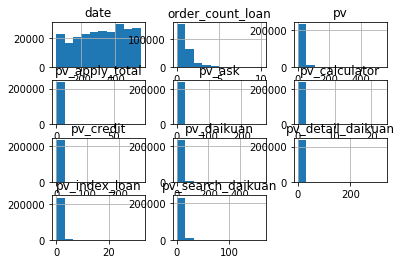

In [12]:
users.hist()


### DA Question 4: Identify the driving factors of higher approval rates
- In this question we would like to ask, what are the key driving factors for a bank, or for a product to have higher or lower loan
approval rate to its applicants?
- Does a bank with a high approval rate does so with all its products, or does it discriminate among different products?
Any rationale that you can think of?
- Across the board, what is the main rationale for a bank to reject or approve loans. Can you use data analysis to
identify it?
- You can also introduce machine learning technique to gain additional insights regarding this.
- The dataset consists of the orders, quality, product, users, where different facets of the loan applications are recorded.
- Evaluate the online user behavior's (those **pv**) influences on the approval rates.
- Evaluate the user credit quality (including education, marriage status, credit history, income, ...) influences on the approval rates.
- Evaluate the loan product attributes (loan term, document requirement, prepayment support ...) influence on the approval rates.
- Evaluate the bank attributes (size/city count, applicant counts, product count, weighted average loan term) on the bank (or the bank's products)
 approval rates.                       
- Among all these factors, which are more important in the classification task of approval outcomes? You could use
$\chi^2$ test or machine learning based feature-importance to gain insights on this.                                                                                                                    

### Step 3 ML Project Ideas
- In this session, we propose several machine learning related project ideas for your team to work on.
- Both supervised and un-supervised learning techniques can be deployed. 
- ${\bf Sampling}$: To reduce the time of trials and errors, you may choose to sample your data (say $10\%$) at the earlier stage before
training on the full data.
- To reduce the sampling biases across time and results, please stratify-down-sampling using the approval flags and 
weekly/monthly time-intervals.

### ML Project Idea 1: Predict Loan Approvals with Imbalanced Classification

-  This is the most apparent project. Use **order_train.txt** and all the side information to train a classification model to predict the approvals/rejections of the bank loans.
-  As different banks have different approval rates, this is an imbalanced classification problem. Try different techniques of imbalanced classification (ROC, weight adjusting, loss score, up or down sampling, or even SMOTE, ....), 
$F_1$ measure, to tackle the imbalance problem. Discuss the pros and cons of each approach.
-  Strong data analysis would provide you the necessary insights to generate new features.
-  Run extensive grid-searchs to tune your model. Try different models and compare their performance.
- Perform **partial dependence plot** (PDP) on your features. You may use **PDPbox** package 
(read https://towardsdatascience.com/introducing-pdpbox-2aa820afd312) instead of **sklearn's partial dependence plot** facility.
- Use **sklearn** pipeline approach to automate your processes if possible.
- To perform dimensionality reduction on the categorical data, you may try **MCA** (multiple correspondence analysis) by using the prince package https://pypi.org/project/prince/#multiple-correspondence-analysis-mca.
- To visualize the distribution of the loan features, you may employ **PCA**, **MCA** and then **t-SNE** for a 2D visualization. 
-  Build probability models to model the loan approval probabilities and study their variations 
-  Optional: **streaming data classification problem**. Because time appears in the dataset, your team may sort the data as a time data stream. Train your classifier to handle a stream of loan applications in monthly batches.
    By this I mean segmenting the data into buckets **YYYYM1**, **YYYYM2**, .... and train/update your models monthly. 
- If you decide to tackle the **data streaming** problem, the **online** learning paradigm could be very useful to you.
- Either you can store your data in tables of a relational database and query the data sequentially, or you can
store the data in flat files indexed by dates (months).

### ML Project Idea 3: Building a Recommendation System
- The **order_train.txt** encodes the interaction between the different users and different products.
- Given that there are $130K+$ distinct users and $12K+$ products, the information can be used to build a product recommender for the customers.
- There are several approaches to build a recommender.
- Given that the same user seldom applies for many loans, it is vital to use the loan application info from the other 'similar' users.
Use cluster analysis to study 'similar' users and use it for recommendations.
- The indicator matrix of user-product pairs, where the entry of the indicator matrix at (user, product) is 1 if the user has applied for 
the product. The value is zero otherwise. A well known approach of **matrix factorization** can be used to factor the
indicator matrix. Some models (like https://turi.com/products/create/docs/graphlab.toolkits.recommender.html) even would allow using side user/product attributes.
- Another variant of matrix factorization technique is **NMF** (non-negative matrix factorization). 
Your team can use **sklearn**'s version of **NMF** to study recommendation problem.
- Another idea to combine clustering technique with **matrix factorization** is to use a suitable **clustering** technique to lump the users (or the products) and build a recommender on the reduced space.

